In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

# Ajustement d'images par correction gamma
Soit $I : \mathbb R^2 \mapsto \mathbb R$ une image. Appliquer une correction gamma à $I$ revient à faire pour tout voxel $(x, y)$ de $I$:
$$ I_{out}(x,y) = I(x,y)^\gamma $$

In [2]:
got = mimg.imread('images/got.jpg')

In [22]:
def gamma(image, gamma):
    return (((image / 255) ** gamma) * 255).astype(np.uint8)

## $\gamma \in \{O.1, 0.5, 0.

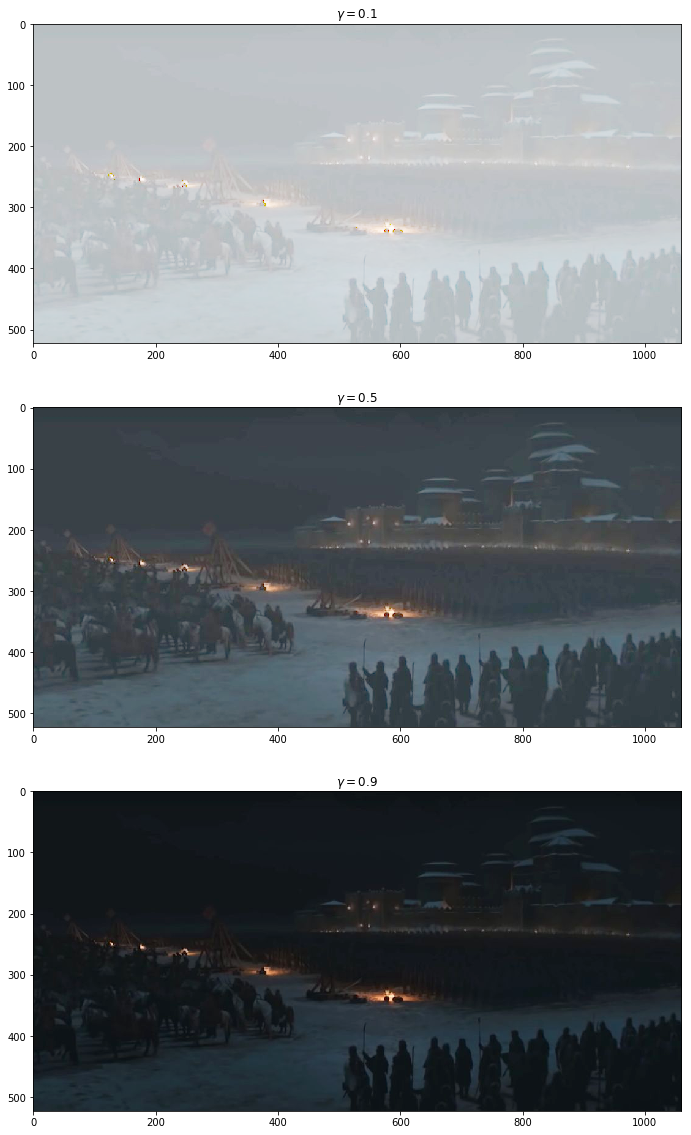

In [30]:
fig, plts = plt.subplots(3, 1, figsize=(40,20))
for p, g in zip(plts, (0.1, 0.5, 0.9)):
    p.imshow(gamma(got, g))
    p.set_title(f'$\gamma = {g}$')

In [32]:
def map_imshow(func, xs, title=None, layout='h', figsize=(15, 15)):
    w, h = (len(xs), 1) if layout == 'h' else (1, len(xs))
    if not title or callable(title):
        ts = [''] * len(xs)
    fig, plts = plt.subplots(w, h, figsize=(40,20))
    for p, x, t in zip(plts, xs, ts):
        p.imshow(func(x))
        p.set_title(t if not callable(title) else title(x))

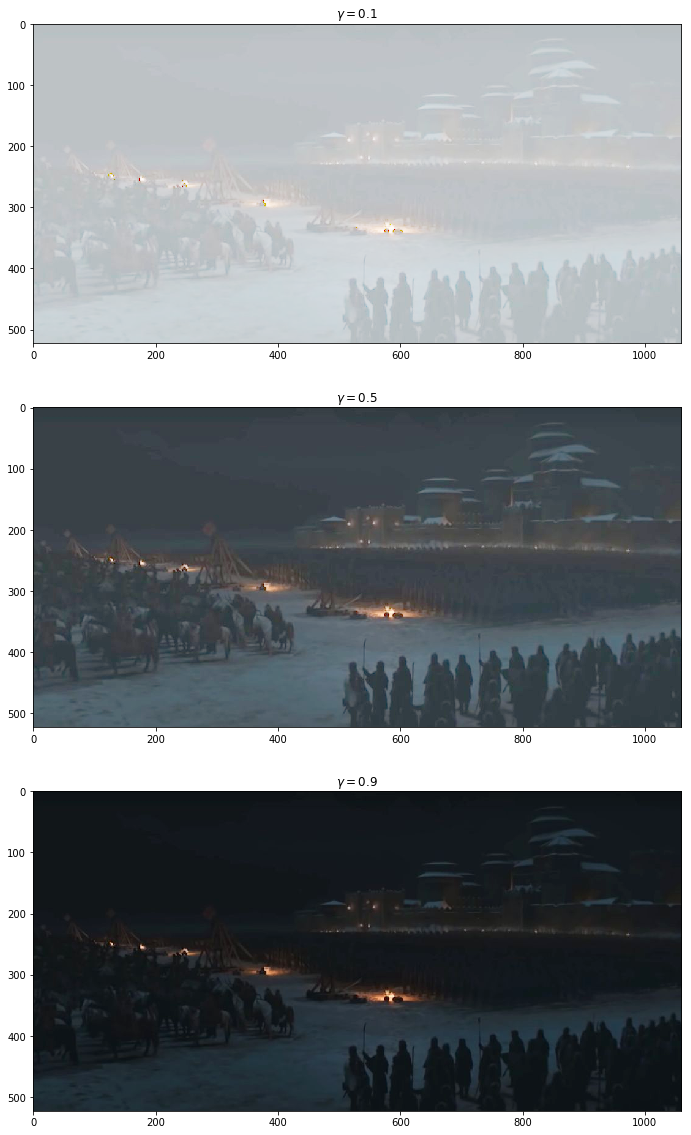

In [33]:
map_imshow(lambda g: gamma(got, g),
           (0.1, 0.5, 0.9), 
           lambda g: f'$\gamma = {g}$',
           figsize=(40,20))